In [ ]:
# Reading and Understanding the data

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Import libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [16]:
bike = pd.read_csv("/Users/shrey/Downloads/day (1).csv")

In [17]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
# Check the descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [184]:
bike.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [20]:
# Check the shape of df

print(bike.shape)

(730, 16)


In [ ]:
#Check for null values

In [22]:
# checking for the null values in column data
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#There are no missing / Null values in columns

In [24]:
# Copying the dataframe into new
bike_copy = bike.copy()

In [25]:
# checking the shape of new dataframe
bike_copy.shape

(730, 16)

In [26]:
# dropping the duplicates
bike_copy.drop_duplicates(inplace=True)

In [27]:
# re-verifying the shape of new dataframe
bike_copy.shape

(730, 16)

In [ ]:
#As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [28]:
# dropping the unwanted columns instant, dteday, casual, registered
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [29]:
# Encoding the season column

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [32]:
# Encoding the month column

bike.month =bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [33]:
# Encoding the weekday column

bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [34]:
# Encoding the weathersit column

bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [35]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


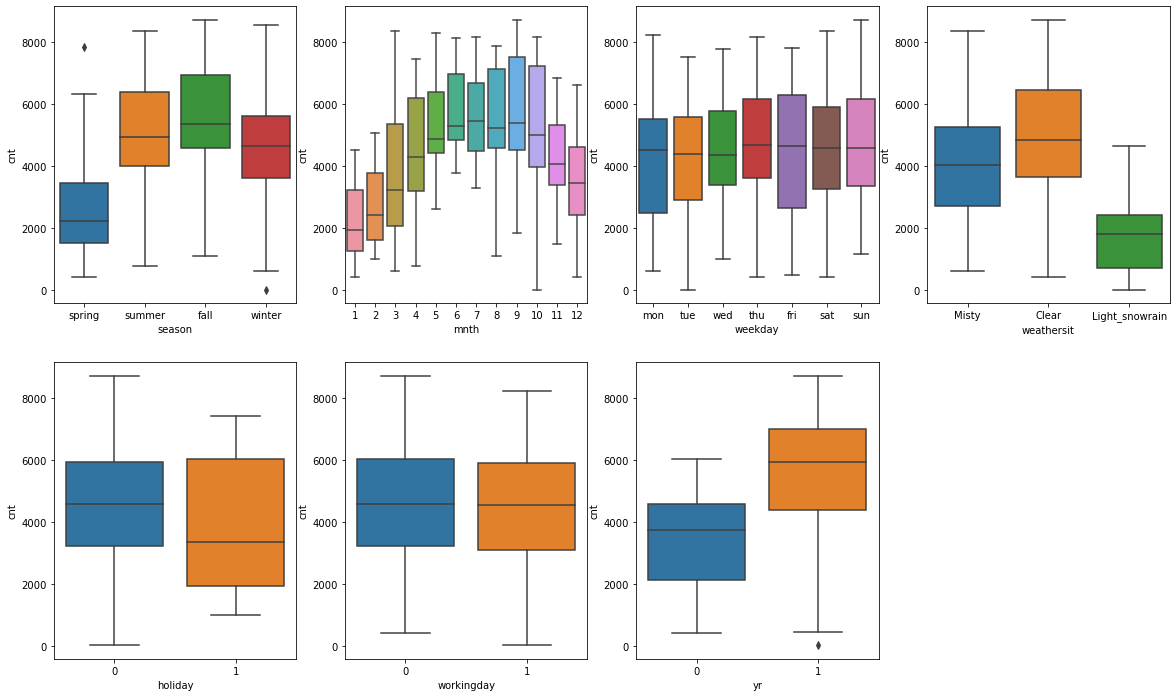

In [43]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

In [54]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike.month,drop_first=True)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike.season,drop_first=True)

In [55]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [61]:
# Merging  the dataframe, with the dummy variable dataset. 

bike_new = pd.concat([bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [62]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,1,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,1,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,1,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,1,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,1,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [63]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    int64  
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [64]:
bike_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [65]:
# check the head of new dataframe

bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
# check the shape of new dataframe

bike_new.shape

(730, 30)

In [67]:
# check the column info of new dataframe 

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

In [202]:
# splitting the dataframe into Train and Test
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [203]:
bike_train.shape

(510, 30)

In [204]:
bike_test.shape

(220, 30)

In [205]:
scaler = MinMaxScaler()
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


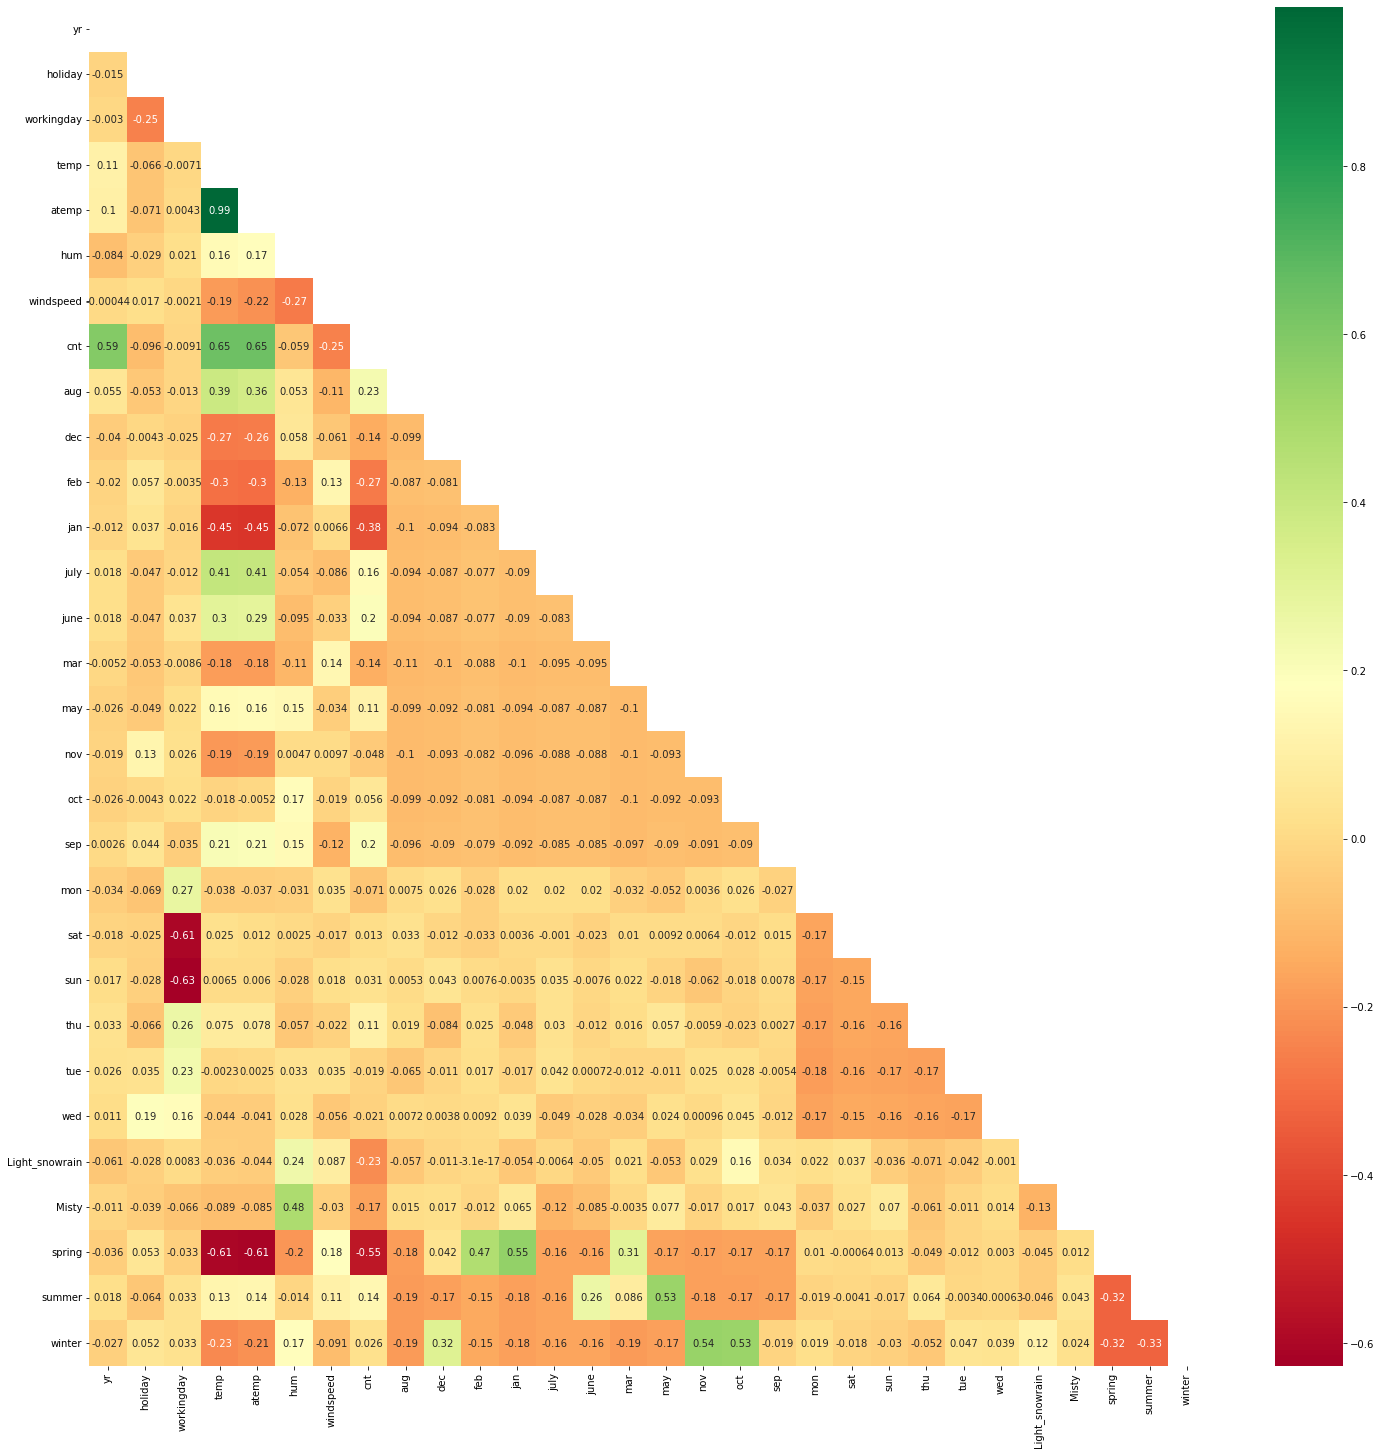

In [206]:
plt.figure(figsize = (25,25))
matrix = np.triu(bike_train.corr())
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

In [77]:
#cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [207]:
from sklearn.preprocessing import MinMaxScaler

In [208]:
scaler = MinMaxScaler()

In [209]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [210]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [211]:
# Building the Linear Model
# print(bike_train)
y_train = bike_train.pop('cnt')
X_train = bike_train

In [246]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [247]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 7),
 ('atemp', False, 14),
 ('hum', False, 13),
 ('windspeed', False, 12),
 ('aug', False, 3),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', False, 9),
 ('june', True, 1),
 ('mar', False, 15),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', False, 2),
 ('sun', True, 1),
 ('thu', False, 8),
 ('tue', False, 5),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', False, 6)]

In [248]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'dec', 'feb', 'jan', 'june', 'may',
       'nov', 'sep', 'sun', 'Light_snowrain', 'Misty', 'spring', 'summer'],
      dtype='object')


In [249]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['temp', 'atemp', 'hum', 'windspeed', 'aug', 'july', 'mar', 'oct', 'mon',
       'sat', 'thu', 'tue', 'wed', 'winter'],
      dtype='object')

In [250]:
# Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [251]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,dec,feb,jan,june,may,nov,sep,sun,Light_snowrain,Misty,spring,summer
576,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
728,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
111,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [252]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
13,spring,3.34
2,workingday,2.93
14,summer,2.37
5,jan,2.13
0,yr,1.85
4,feb,1.85
7,may,1.65
12,Misty,1.52
10,sun,1.38
6,june,1.29


In [258]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.83e-159
Time:                        18:28:56   Log-Likelihood:                -4181.8
No. Observations:                 510   AIC:                             8396.
Df Residuals:                     494   BIC:                             8463.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4742.1402    138.109     34.

In [260]:
# As humidity shows high VIF values hence we can drop it, already dropped through RFE
# X_train_new = X_train_rfe.drop(['temp', 'atemp'])
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
13,spring,3.34
2,workingday,2.93
14,summer,2.37
5,jan,2.13
0,yr,1.85
4,feb,1.85
7,may,1.65
12,Misty,1.52
10,sun,1.38
6,june,1.29


In [261]:
# model 2
X_train_lm_2 = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.83e-159
Time:                        18:30:00   Log-Likelihood:                -4181.8
No. Observations:                 510   AIC:                             8396.
Df Residuals:                     494   BIC:                             8463.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4742.1402    138.109     34.

In [263]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_rfe.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
12,spring,3.28
2,workingday,2.62
13,summer,2.28
5,jan,2.12
0,yr,1.84
4,feb,1.84
7,may,1.65
11,Misty,1.51
9,sun,1.36
6,june,1.28


In [264]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.83e-159
Time:                        18:30:43   Log-Likelihood:                -4181.8
No. Observations:                 510   AIC:                             8396.
Df Residuals:                     494   BIC:                             8463.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4742.1402    138.109     34.

In [266]:
X_train_new = X_train_rfe.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
12,spring,3.27
2,workingday,2.42
13,summer,2.30
5,jan,2.13
4,feb,1.85
0,yr,1.73
7,may,1.65
11,Misty,1.47
6,june,1.28
8,nov,1.23


In [276]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          8.83e-160
Time:                        18:36:38   Log-Likelihood:                -4183.6
No. Observations:                 510   AIC:                             8397.
Df Residuals:                     495   BIC:                             8461.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4549.2283     92.599     49.

In [277]:
# X_train_new.head()
X_train_new = X_train_new.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
11,spring,3.15
12,summer,2.15
4,jan,2.12
3,feb,1.84
6,may,1.65
0,yr,1.57
10,Misty,1.45
5,june,1.25
2,dec,1.15
7,nov,1.12


In [278]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.69e-160
Time:                        18:37:15   Log-Likelihood:                -4184.5
No. Observations:                 510   AIC:                             8397.
Df Residuals:                     496   BIC:                             8456.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4569.2835     91.404     49.

In [280]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
10,spring,3.15
11,summer,2.15
3,jan,2.12
2,feb,1.83
5,may,1.65
0,yr,1.57
9,Misty,1.44
4,june,1.25
1,dec,1.15
7,sep,1.11


In [281]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          3.58e-160
Time:                        18:39:09   Log-Likelihood:                -4187.9
No. Observations:                 510   AIC:                             8402.
Df Residuals:                     497   BIC:                             8457.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4560.8566     91.867     49.

In [282]:
# Checking the parameters and their coefficient values
lr_6.params

const             4560.856583
yr                2147.790396
dec              -1058.909392
feb               -898.920999
jan              -1332.431198
june               779.833022
may                830.184560
nov              -1052.575105
sep                583.666050
Light_snowrain   -2776.891553
Misty             -711.014306
spring           -1846.894332
summer            -846.495139
dtype: float64

In [283]:
X_train_lm_6

,const,yr,dec,feb,jan,june,may,nov,sep,Light_snowrain,Misty,spring,summer
576,1.0,1,0,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0,0,0,0,0,0,1,1,0
728,1.0,1,1,0,0,0,0,0,0,0,0,1,0
482,1.0,1,0,0,0,0,0,0,0,0,1,0,1
111,1.0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0,0,0,0,0,0,0,1,0
350,1.0,0,1,0,0,0,0,0,0,0,1,0,0
79,1.0,0,0,0,0,0,0,0,0,0,1,0,1


In [284]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

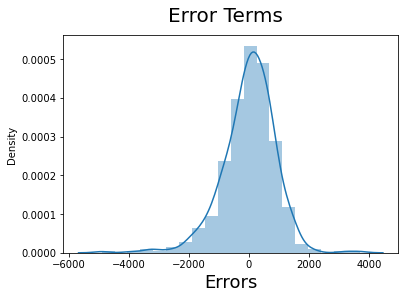

In [285]:
#Normality of error terms
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [286]:
#Multi Colinearity
calculateVIF(X_train_new)

,Features,VIF
10,spring,3.15
11,summer,2.15
3,jan,2.12
2,feb,1.83
5,may,1.65
0,yr,1.57
9,Misty,1.44
4,june,1.25
1,dec,1.15
7,sep,1.11


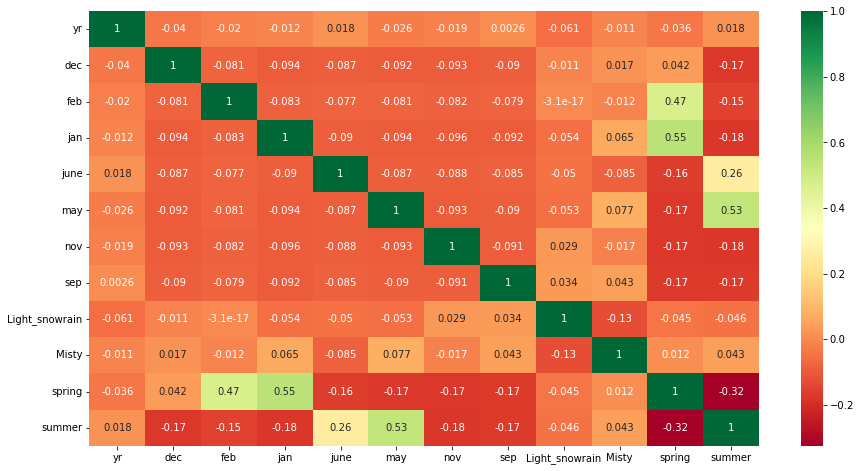

In [287]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

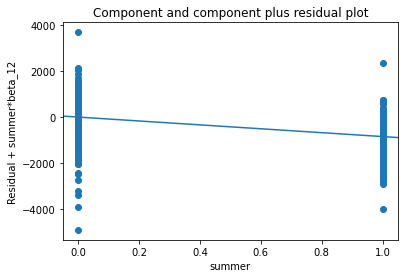

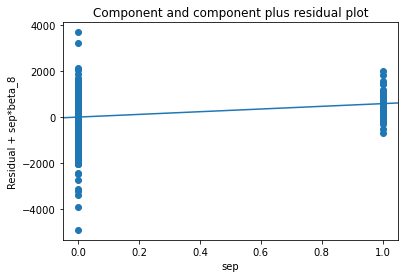

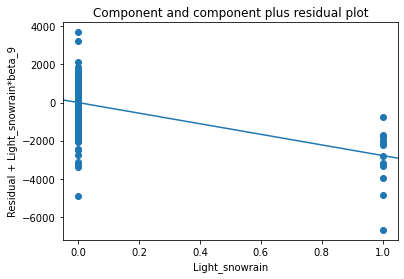

In [291]:
#Linearity
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'summer')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Light_snowrain')
plt.show()

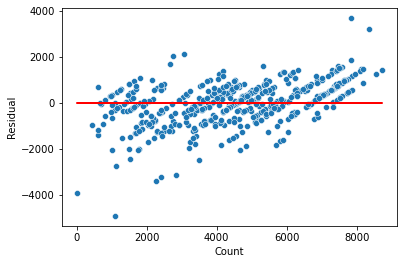

In [292]:
#Homoscedasticity
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [300]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,20.808400,24.250312,61.934025,12.598352,4560.559091,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,7.672796,8.281075,14.429542,4.973534,1904.968544,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [302]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [303]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [304]:
y_pred = lr_6.predict(X_test_lm_6)

In [305]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8103

Text(0, 0.5, 'y_pred')

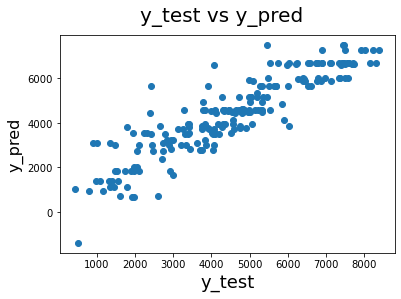

In [306]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [307]:
round(lr_6.params,4)

const             4560.8566
yr                2147.7904
dec              -1058.9094
feb               -898.9210
jan              -1332.4312
june               779.8330
may                830.1846
nov              -1052.5751
sep                583.6661
Light_snowrain   -2776.8916
Misty             -711.0143
spring           -1846.8943
summer            -846.4951
dtype: float64

In [308]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7993


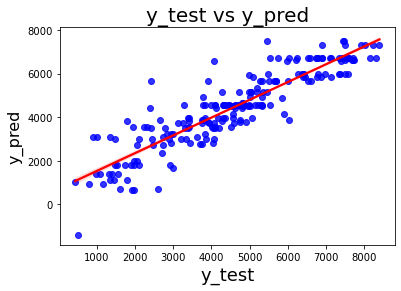

In [309]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
#Comparision between Training and Testing dataset:
#Train dataset R^2          : 0.833
#Test dataset R^2           : 0.8103
#Train dataset Adjusted R^2 : 0.829    
#Test dataset Adjusted R^2  : 0.7993

In [ ]:
#Significant variables to predict the demand for shared bikes
#holiday
#temp
#hum
#windspeed
#Season (Summer, Spring)
#Months (January, February, May, June, September, November, December)
#Year (2019)
#Sunday
#Weathersit ( Light Snow, Mist + Cloudy)
#Hence when the situation comes back to normal, the company should come up with new offers during summer and spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.
